In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASETS = ["mnist", "cifar10", "imagenet", "gtsrb"]
MODELS = ["alexnet", 
          "efficientnetB0", 
          "lenet5",  
          "mobilenet", 
          "mobilenetV2", 
          "resnet18",
          "resnet34",
          "resnet50",
          "resnet152", 
          "vgg16",
          "ViT-b_16p_224"]
PRECISIONS = ["fp32", "int8", "uint8"]

accuracy = np.array([
    [ # alexnet
      [np.nan] * len(PRECISIONS), # MNIST
      [71.11, 68.06, 67.93],  # CIFAR10
      [np.nan] * len(PRECISIONS),   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # efficientnetB0
      [np.nan] * len(PRECISIONS), # MNIST
      [93.00, 59.87, 59.87],  # CIFAR10
      [75.99, 59.31, 59.72],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # lenet5
      [98.49, 98.61, 98.61],   # MNIST
      [np.nan] * len(PRECISIONS),   # CIFAR10
      [np.nan] * len(PRECISIONS),   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # mobilenet
      [np.nan] * len(PRECISIONS), # MNIST
      [93.04, 91.19, 91.37],  # CIFAR10
      [70.14, 69.07, 69.27],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # mobilenetV2
      [np.nan] * len(PRECISIONS), # MNIST
      [92.20, 91.13, 91.07],  # CIFAR10
      [70.75, 70.70, 70.83],   # IMAGENET
      [89.45, 89.58, 89.59],   # GTSRB
    ],
    [ # resnet18
      [np.nan] * len(PRECISIONS), # MNIST
      [92.11, 91.97, 91.97],  # CIFAR10
      [np.nan] * len(PRECISIONS),   # IMAGENET
      [93.19, 93.18, 93.13],   # GTSRB
    ],
    [ # resnet34
      [np.nan] * len(PRECISIONS), # MNIST
      [92.86, 92.76, 92.83],  # CIFAR10
      [np.nan] * len(PRECISIONS),   # IMAGENET
      [94.96, 95.00, 95.10],   # GTSRB
    ],
    [ # resnet50
      [np.nan] * len(PRECISIONS), # MNIST
      [94.15, 94.20, 94.29],  # CIFAR10
      [71.54, 71.06, 71.20],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # resnet152
      [np.nan] * len(PRECISIONS), # MNIST
      [95.00, 24.71, 24.95],  # CIFAR10
      [73.68, 64.92, 64.85],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # vgg16
      [np.nan] * len(PRECISIONS), # MNIST
      [87.65, 87.58, 87.36],  # CIFAR10
      [65.86, 65.93, 66.03],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
    [ # ViT-b_16p_224
      [np.nan] * len(PRECISIONS), # MNIST
      [np.nan] * len(PRECISIONS),  # CIFAR10
      [81.15, np.nan, np.nan],   # IMAGENET
      [np.nan] * len(PRECISIONS),   # GTSRB
    ],
])  

/var/folders/90/x64vzw396x9fdk6l553gkmkh0000gn/T/ipykernel_2295/3665101900.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.99, 1])  # leave space for colorbar


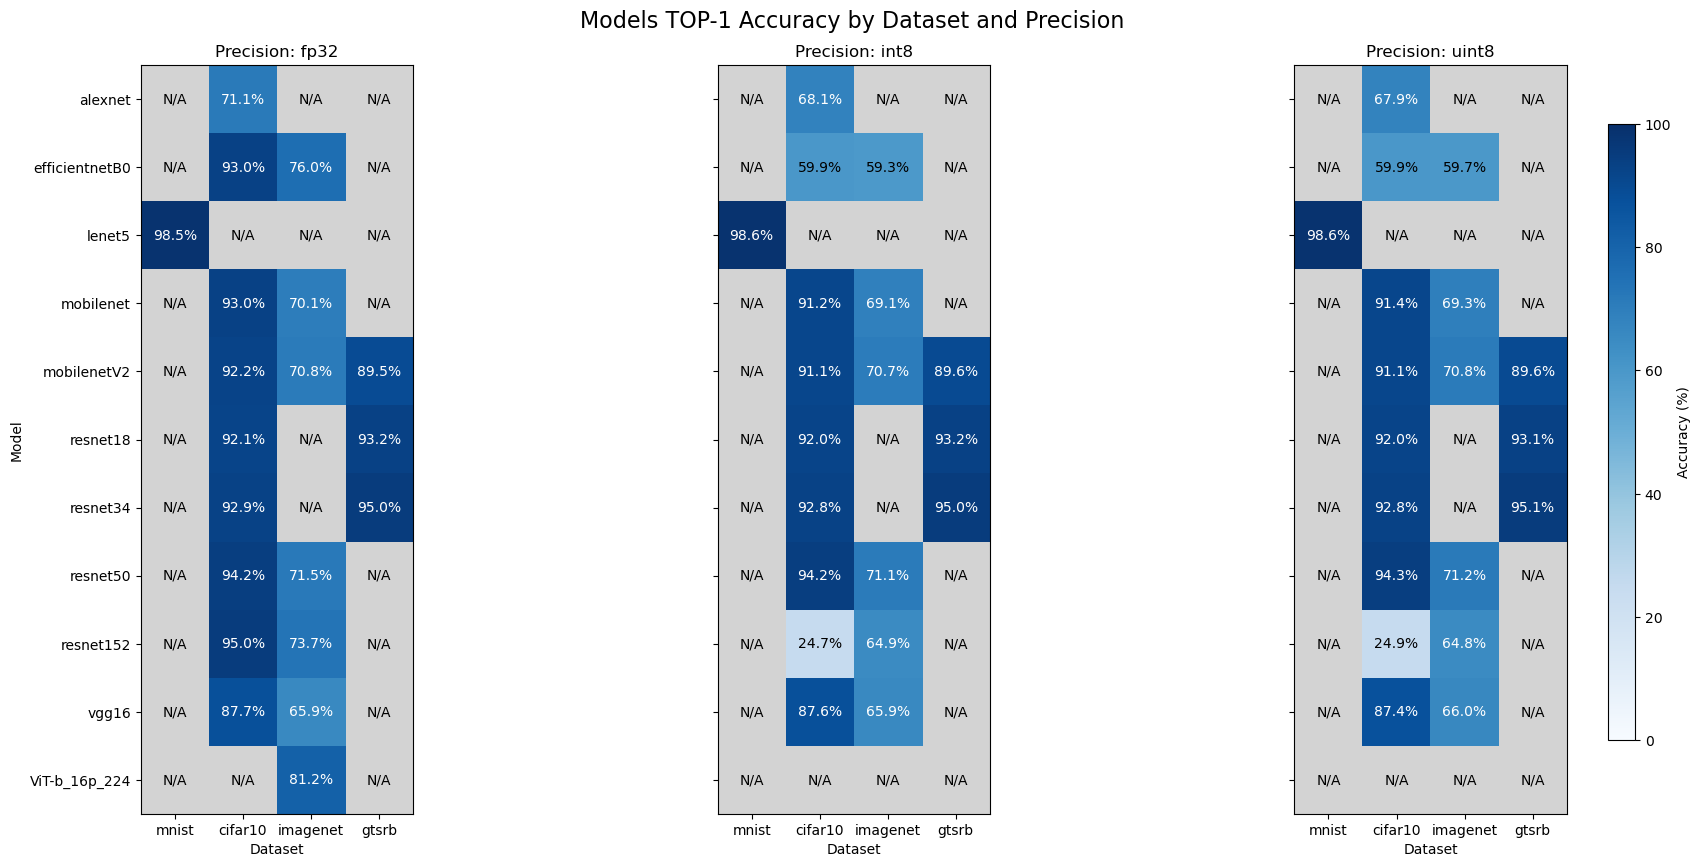

In [11]:
num_models = len(MODELS)
num_datasets = len(DATASETS)
num_precisions = len(PRECISIONS)

# Adaptive size
cell_width = 1.5
cell_height = 0.8
fig_width = num_precisions * num_datasets * cell_width
fig_height = num_models * cell_height

fig, axes = plt.subplots(1, num_precisions, figsize=(fig_width, fig_height),
                         gridspec_kw={'wspace': 0}, squeeze=False)

for p_idx, precision in enumerate(PRECISIONS):
    ax = axes[0, p_idx]
    heatmap = accuracy[:, :, p_idx]

    # Mask missing
    masked_heatmap = np.ma.masked_invalid(heatmap)
    cmap = plt.cm.Blues
    cmap.set_bad(color='lightgray')

    im = ax.imshow(masked_heatmap, cmap=cmap, vmin=0, vmax=100)

    norm = plt.Normalize(vmin=0, vmax=100)
    for i in range(num_models):
        for j in range(num_datasets):
            val = heatmap[i, j]
            if np.isnan(val):
                label = "N/A"
                color = "black"
            else:
                label = f"{val:.1f}%"
                rgba = cmap(norm(val))
                luminance = 0.299 * rgba[0] + 0.587 * rgba[1] + 0.114 * rgba[2]
                color = "black" if luminance > 0.5 else "white"
            ax.text(j, i, label, ha="center", va="center", color=color)

    ax.set_xticks(np.arange(num_datasets))
    ax.set_xticklabels(DATASETS)
    ax.set_yticks(np.arange(num_models))
    if p_idx == 0:
        ax.set_yticklabels(MODELS)
        ax.set_ylabel("Model")
    else:
        ax.set_yticklabels([])
    ax.set_title(f"Precision: {precision}")
    ax.set_xlabel("Dataset")

# Colorbar on far right
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Accuracy (%)")

fig.suptitle("Models TOP-1 Accuracy by Dataset and Precision", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.99, 1])  # leave space for colorbar
plt.savefig("accuracy_map.png", bbox_inches="tight")
plt.show()